### Case Study Retail Mart 

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [11]:
# Load the Data 

df = pd.read_csv(r"C:\Users\Holiness\Downloads\retailmart_data - retailmart_data.csv")

In [12]:
# Understand the data 

df.head()

,Date,Category,Region,Weather,Advertising,Discount,Month,Year,Season,Sales,Customer_Count,Profit
0,2022-01-01,Home Goods,East,Cloudy,1275.18,15.74,January,2022,Winter,2679.56,95,652.90
1,2022-01-02,Electronics,West,Cloudy,1893.89,24.74,January,2022,Winter,3859.05,147,924.16
2,2022-01-02,Apparel,East,Sunny,727.38,8.46,January,2022,Winter,2450.71,79,512.75
3,2022-01-02,Apparel,South,Rainy,1757.23,15.37,January,2022,Winter,3056.75,97,624.60
4,2022-01-05,Home Goods,North,Cloudy,1507.46,16.22,January,2022,Winter,2840.15,116,617.43


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1000 non-null   object 
 1   Category        1000 non-null   object 
 2   Region          1000 non-null   object 
 3   Weather         1000 non-null   object 
 4   Advertising     1000 non-null   float64
 5   Discount        1000 non-null   float64
 6   Month           1000 non-null   object 
 7   Year            1000 non-null   int64  
 8   Season          1000 non-null   object 
 9   Sales           1000 non-null   float64
 10  Customer_Count  1000 non-null   int64  
 11  Profit          1000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 93.9+ KB


### Time-series Analysis 

In [15]:
# Convert the Date Column to pandas datetime format 

df["Date"] = pd.to_datetime(df["Date"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1000 non-null   datetime64[ns]
 1   Category        1000 non-null   object        
 2   Region          1000 non-null   object        
 3   Weather         1000 non-null   object        
 4   Advertising     1000 non-null   float64       
 5   Discount        1000 non-null   float64       
 6   Month           1000 non-null   object        
 7   Year            1000 non-null   int64         
 8   Season          1000 non-null   object        
 9   Sales           1000 non-null   float64       
 10  Customer_Count  1000 non-null   int64         
 11  Profit          1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 93.9+ KB


In [18]:
# what range of date do we have in this data 
df["Date"].max()

Timestamp('2024-09-30 00:00:00')

In [19]:
df["Category"].unique()

array(['Home Goods', 'Electronics', 'Apparel'], dtype=object)

In [23]:
home_goods = df[df["Category"]=="Home Goods"]
electronics = df[df["Category"]=="Electronics"]
apparel = df[df["Category"]=="Apparel"]

home_goods

,Date,Category,Region,Weather,Advertising,Discount,Month,Year,Season,Sales,Customer_Count,Profit
0,2022-01-01,Home Goods,East,Cloudy,1275.18,15.74,January,2022,Winter,2679.56,95,652.90
4,2022-01-05,Home Goods,North,Cloudy,1507.46,16.22,January,2022,Winter,2840.15,116,617.43
5,2022-01-05,Home Goods,North,Rainy,1576.36,10.18,January,2022,Winter,2384.53,81,594.50
9,2022-01-10,Home Goods,South,Snowy,1681.06,12.21,January,2022,Winter,2723.22,98,614.62
10,2022-01-12,Home Goods,East,Cloudy,1145.15,10.42,January,2022,Winter,2341.12,83,606.44
...,...,...,...,...,...,...,...,...,...,...,...,...
982,2024-09-12,Home Goods,West,Cloudy,1092.10,28.21,September,2024,Fall,2371.27,161,629.08
987,2024-09-18,Home Goods,West,Rainy,1476.44,27.62,September,2024,Fall,2760.43,161,594.41
991,2024-09-22,Home Goods,North,Cloudy,597.03,28.33,September,2024,Fall,2191.84,163,546.20
997,2024-09-29,Home Goods,North,Snowy,936.72,29.62,September,2024,Fall,2516.03,176,560.81


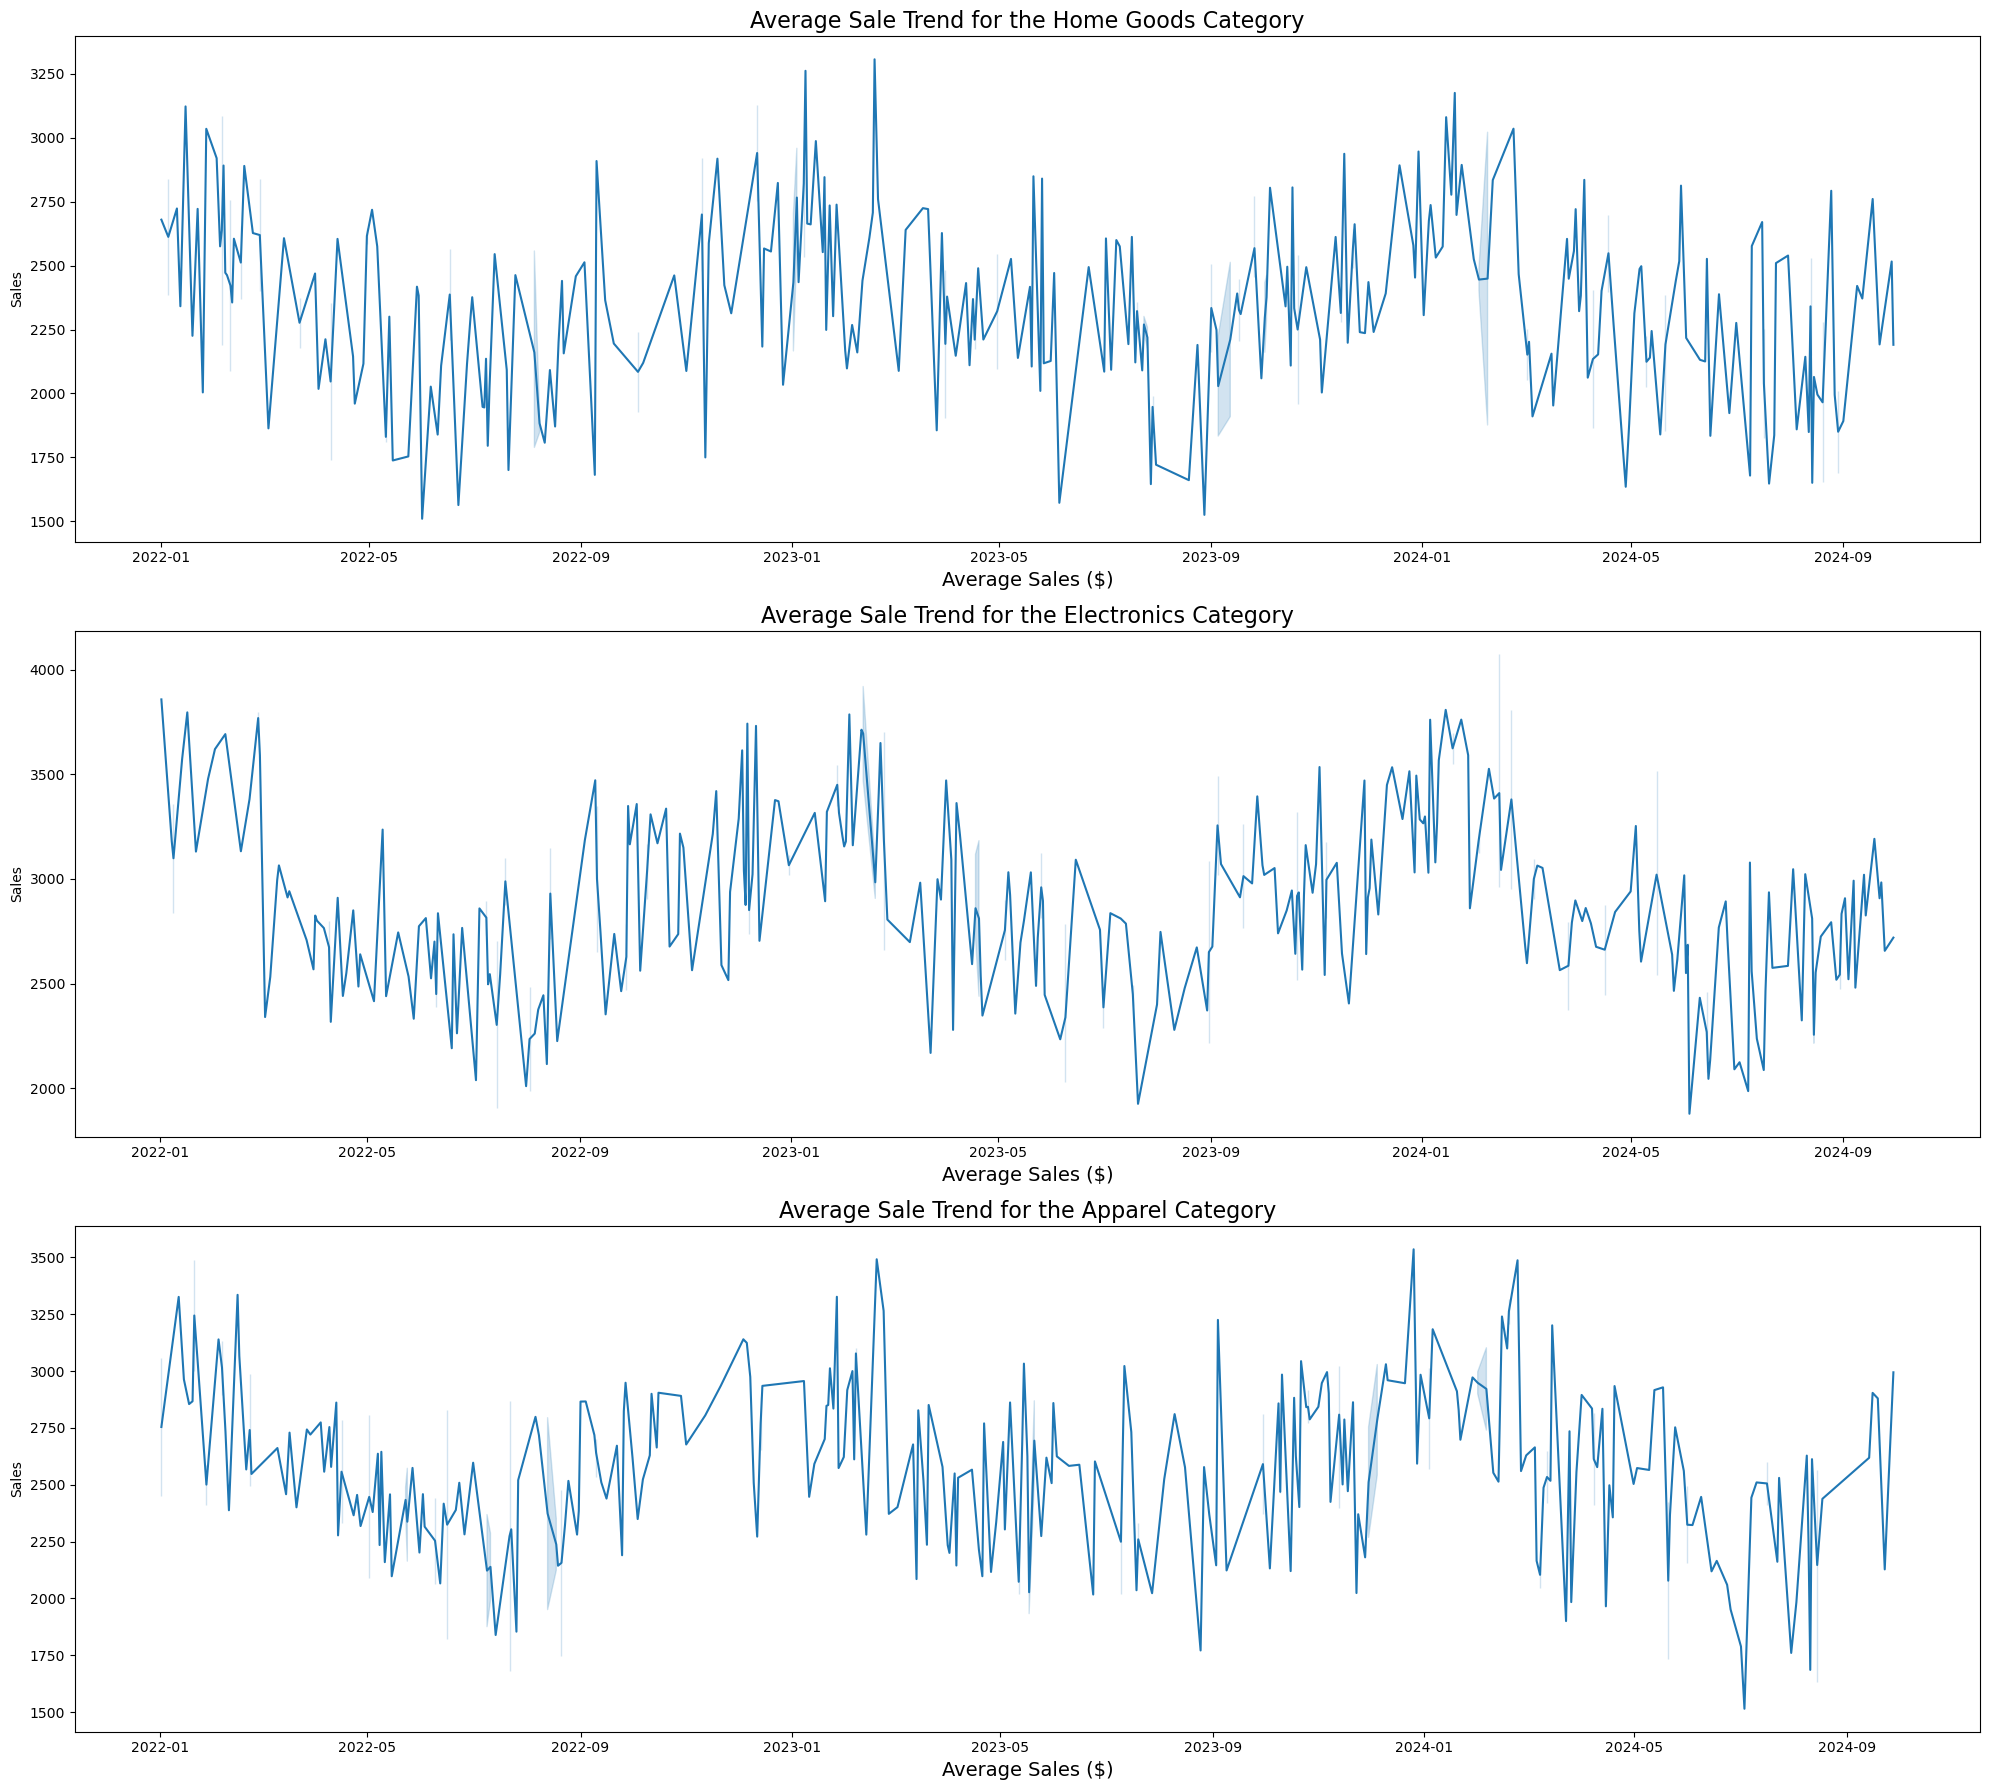

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 18))

sns.lineplot(x="Date", y="Sales", data=home_goods, ax=ax [0])
ax[0].set_title("Average Sale Trend for the Home Goods Category", fontsize=16)
ax[0].set_xlabel("Date")
ax[0].set_xlabel("Average Sales ($)", fontsize=14)

sns.lineplot(x="Date", y="Sales", data=electronics, ax=ax [1])
ax[1].set_title("Average Sale Trend for the Electronics Category", fontsize=16)
ax[1].set_xlabel("Date")
ax[1].set_xlabel("Average Sales ($)", fontsize=14)

sns.lineplot(x="Date", y="Sales", data=apparel, ax=ax [2])
ax[2].set_title("Average Sale Trend for the Apparel Category", fontsize=16)
ax[2].set_xlabel("Date")
ax[2].set_xlabel("Average Sales ($)", fontsize=14)

plt.tight_layout()
plt.show()

***Insight:*** Seasonal spikes are visible during the holiday months (January-December) and slight dips during summer months.

### Let's visualise this seasonality across monthly sales 

In [27]:
df["Year_Month"] = df["Date"].dt.to_period("M").astype(str)

In [28]:
df.head()

,Date,Category,Region,Weather,Advertising,Discount,Month,Year,Season,Sales,Customer_Count,Profit,Year_Month
0,2022-01-01,Home Goods,East,Cloudy,1275.18,15.74,January,2022,Winter,2679.56,95,652.90,2022-01
1,2022-01-02,Electronics,West,Cloudy,1893.89,24.74,January,2022,Winter,3859.05,147,924.16,2022-01
2,2022-01-02,Apparel,East,Sunny,727.38,8.46,January,2022,Winter,2450.71,79,512.75,2022-01
3,2022-01-02,Apparel,South,Rainy,1757.23,15.37,January,2022,Winter,3056.75,97,624.60,2022-01
4,2022-01-05,Home Goods,North,Cloudy,1507.46,16.22,January,2022,Winter,2840.15,116,617.43,2022-01


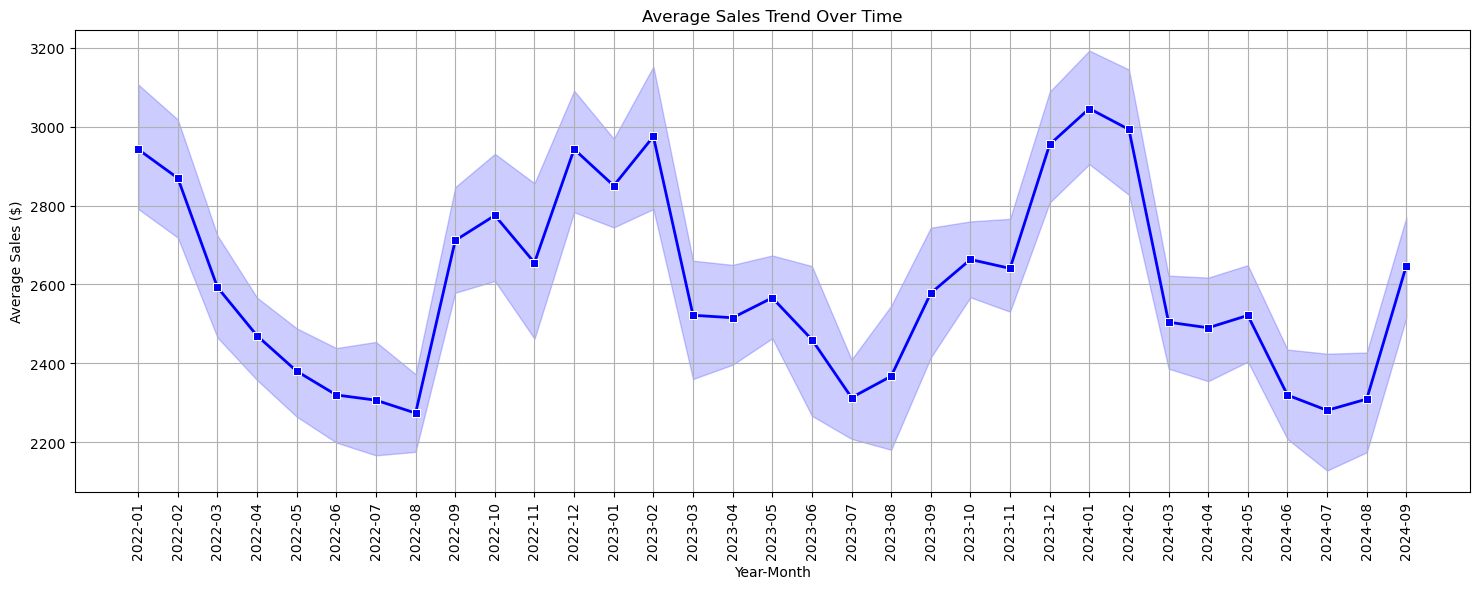

In [33]:
plt.figure(figsize=(18,6))

sns.lineplot(x="Year_Month", y="Sales", data=df, color="blue", marker="s", linewidth=2)
plt.title("Average Sales Trend Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Average Sales ($)")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

***Insight***: Indeed seasonality appears in the data, sales are up around the holiday seasons (from September to December) and dips during summer. 

### Confirm this trend by plotting the average monthly sales across different seasons

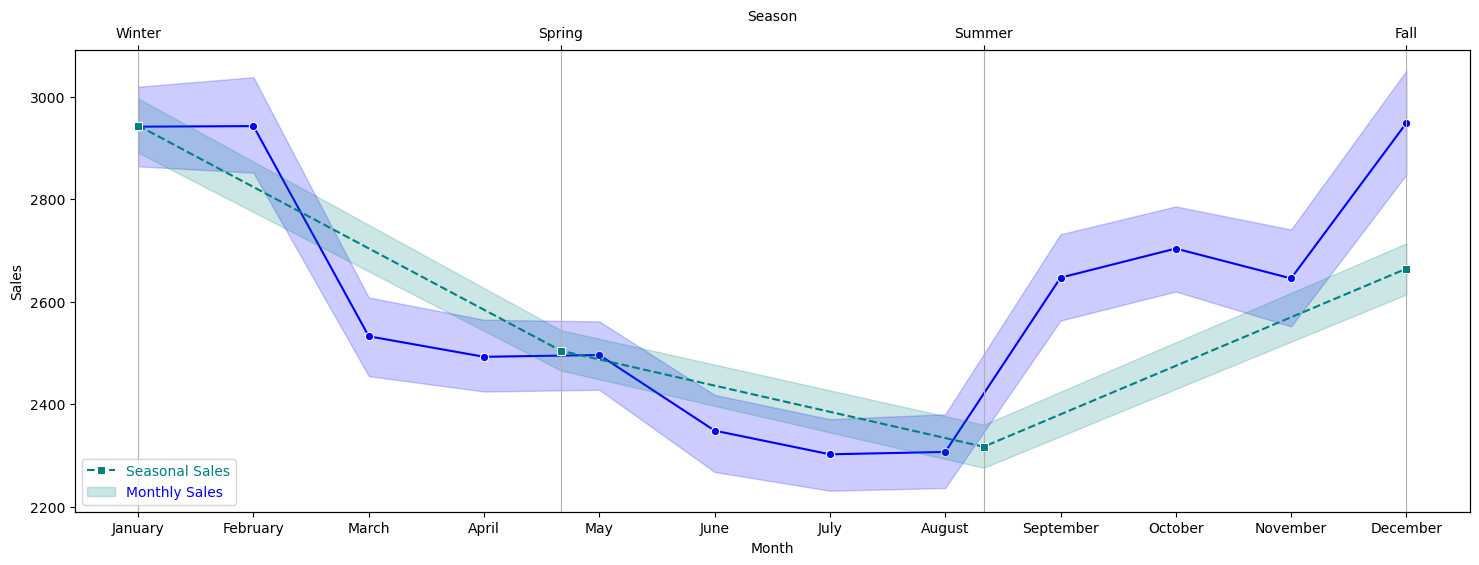

In [41]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.lineplot(x="Month", y="Sales", data=df, color="blue", marker="o")
ax2= ax.twiny()
sns.lineplot(x="Season", y="Sales", data=df, color="teal", marker="s", linestyle="--")

plt.legend(labels=["Seasonal Sales", "Monthly Sales"], loc="lower left", labelcolor=["teal", "blue"])

plt.grid(True)
plt.show()

***Insight***: The seasonality peak (in the winter and fall) and dip (in spring and summer) in sales is confirmed as suspected.

### Customer Activity Analysis 

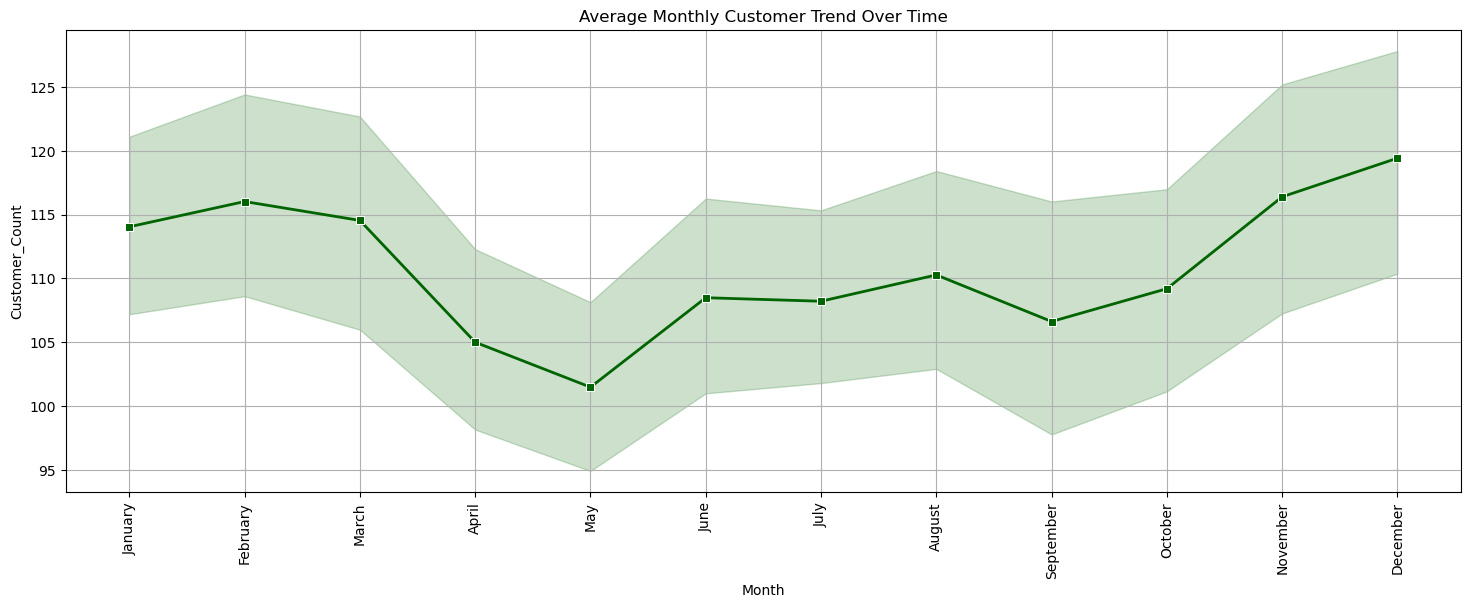

In [45]:
# Monthly Customer Trend Analysis 
plt.figure(figsize=(18,6))

sns.lineplot(x="Month", y="Customer_Count", data=df, color="darkgreen", marker="s", linewidth=2)
plt.title("Average Monthly Customer Trend Over Time")
plt.xlabel("Month")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

***Insight***: Customer activity spikes during holiday seasons, aligning with sales trends. 

### Analysis over the entire timeline 

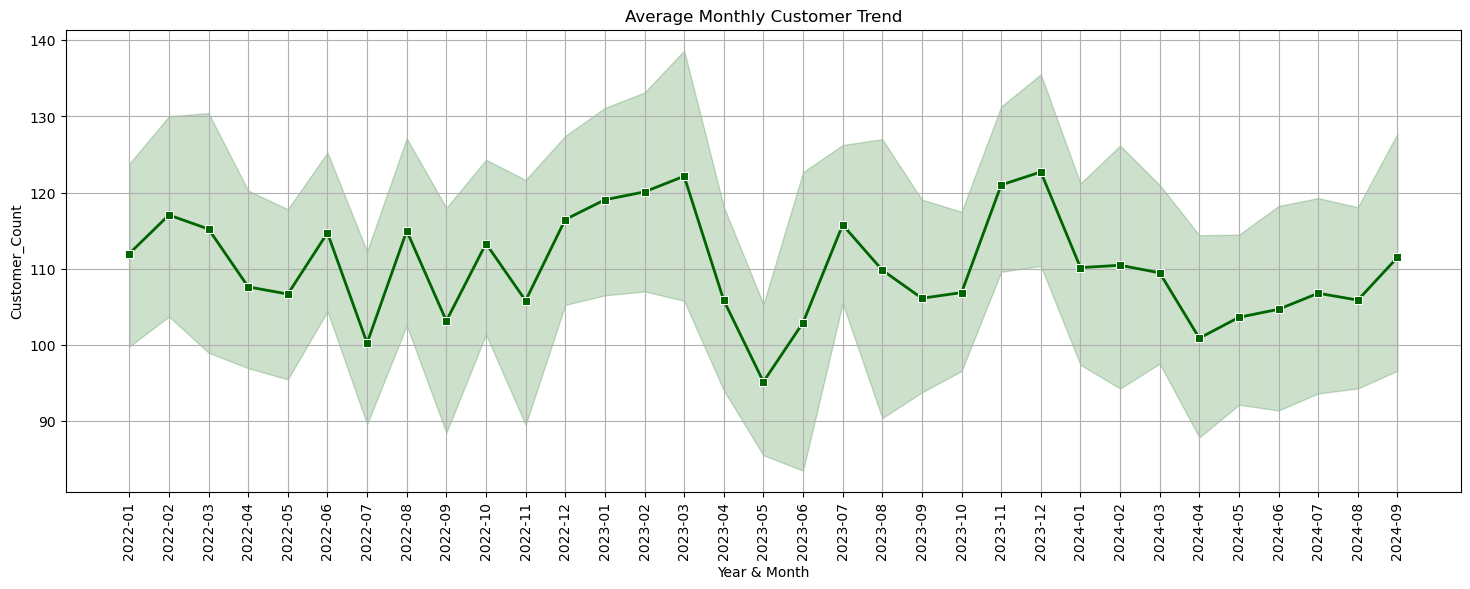

In [49]:
plt.figure(figsize=(18,6))

sns.lineplot(x="Year_Month", y="Customer_Count", data=df, color="darkgreen", marker="s", linewidth=2)
plt.title("Average Monthly Customer Trend")
plt.xlabel("Year & Month")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

***Insights***: 2023's holiday season had the most customer growth, meanwhile the spring of the same year also had the highest dip in customer count.

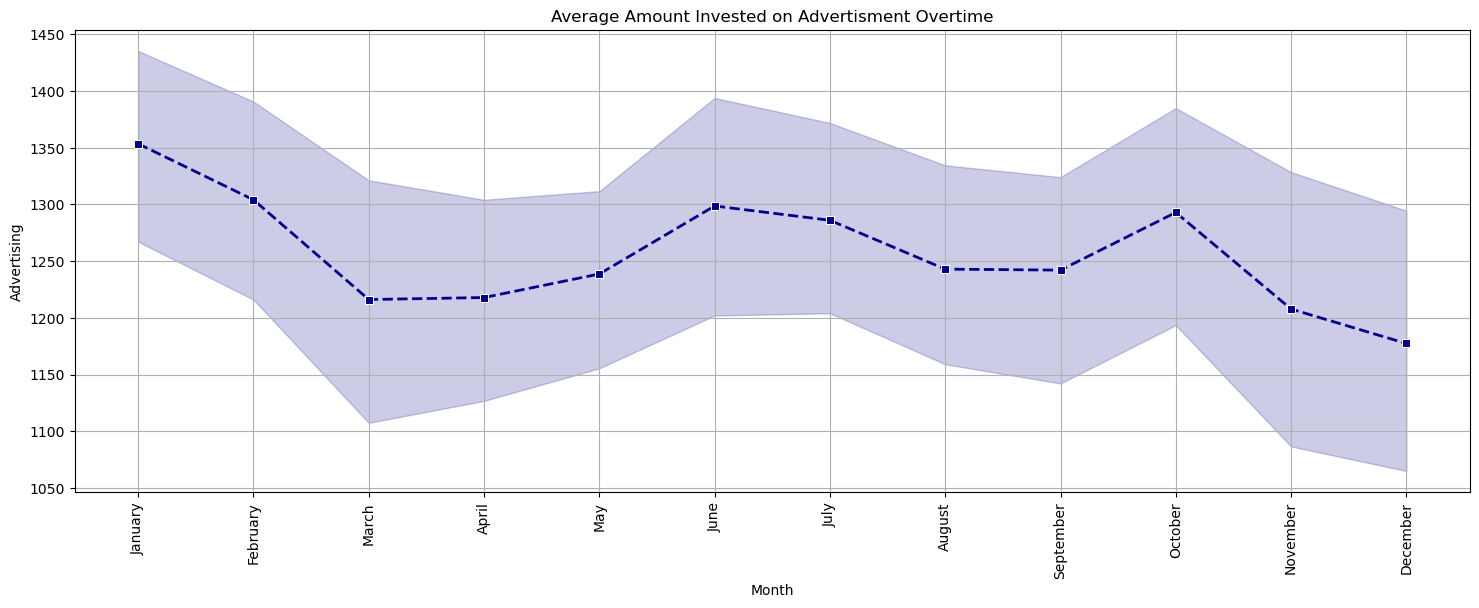

In [51]:
# Advertising Analysis 

plt.figure(figsize=(18,6))

sns.lineplot(x="Month", y="Advertising", data=df, color="darkblue", marker="s", linewidth=2, linestyle="--")
plt.title("Average Amount Invested on Advertisment Overtime")
plt.xlabel("Month")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

***Insight***: Reduction in advertisment budget during holiday season when sales is expected to peak normally.

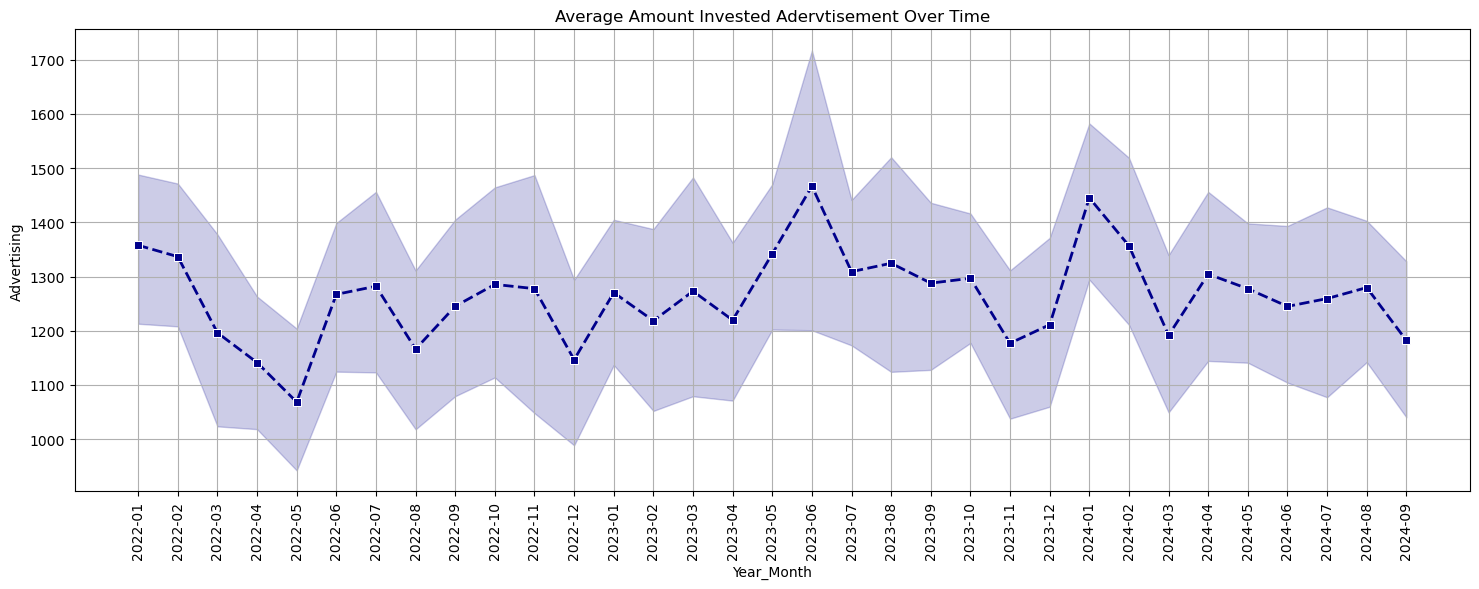

In [55]:
plt.figure(figsize=(18,6))

sns.lineplot(x="Year_Month", y="Advertising", data=df, color="darkblue", marker="s", linestyle="--", linewidth=2)
plt.title("Average Amount Invested Adervtisement Over Time")
plt.xlabel("Year_Month")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

***Insight***: The holiday season and spring of 2023 again had the largest budget for advertisement. As in previous chart, budget allocation for advertisement is expected to reduce during holiday seasons. However, the inverse was the case in 2023, probably due to the significant drop in customer activities earlier that same year. 

### Average Advertising and Sales Trend Over Time 

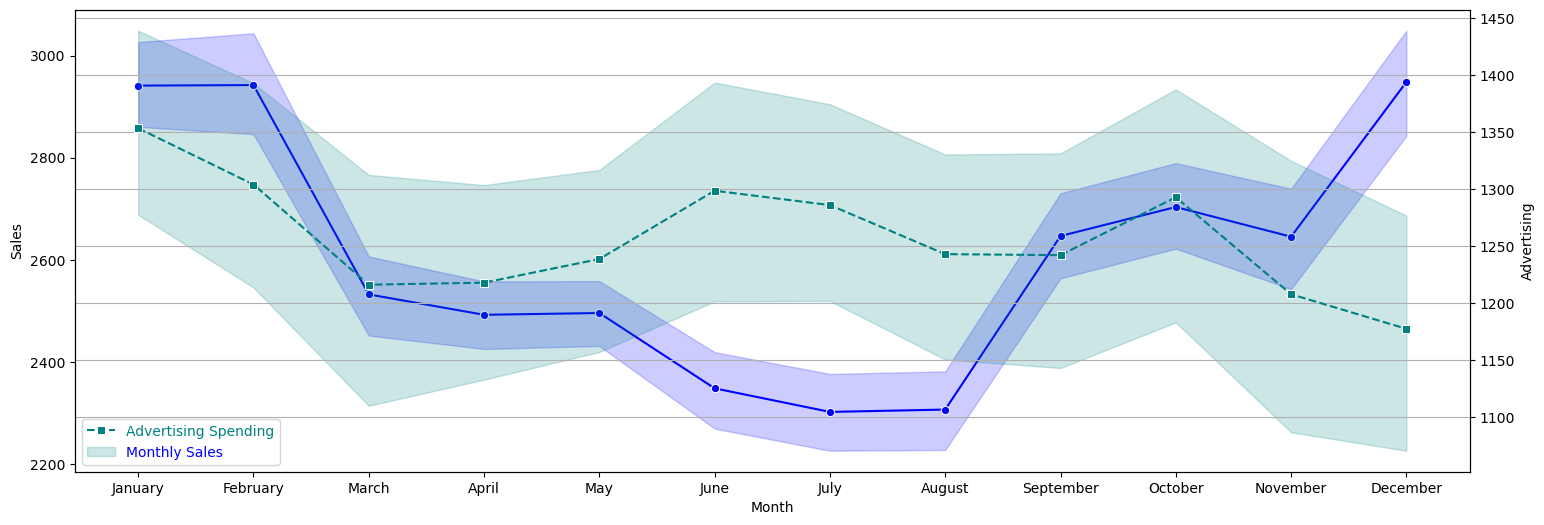

In [58]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.lineplot(x="Month", y="Sales", data=df, color="blue", marker="o")
ax2= ax.twinx()
sns.lineplot(x="Month", y="Advertising", data=df, color="teal", marker="s", linestyle="--")

plt.legend(labels=["Advertising Spending", "Monthly Sales"], loc="lower left", labelcolor=["teal", "blue"])

plt.grid(True)
plt.show()

***Insight***: Sales activity spikes during holiday seasons, opposing advertisement trends.

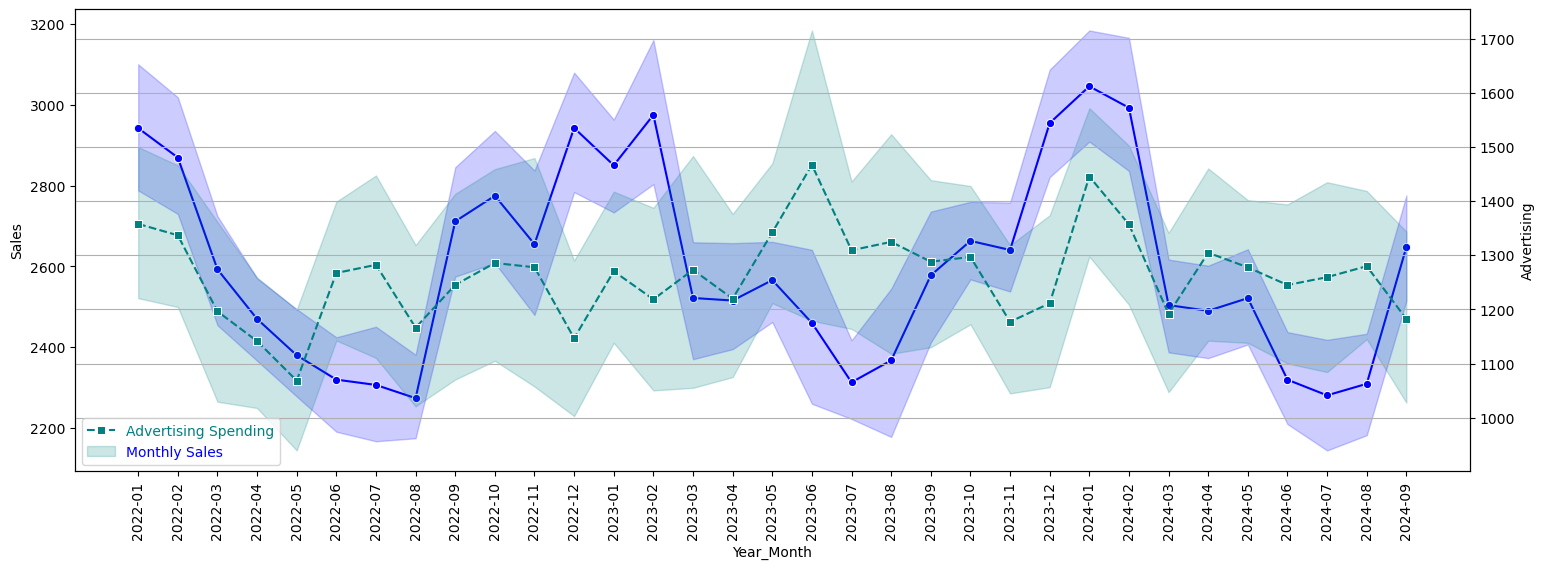

In [61]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.lineplot(x="Year_Month", y="Sales", data=df, color="blue", marker="o")
plt.xticks(rotation=90)
ax2= ax.twinx()
sns.lineplot(x="Year_Month", y="Advertising", data=df, color="teal", marker="s", linestyle="--")

plt.legend(labels=["Advertising Spending", "Monthly Sales"], loc="lower left", labelcolor=["teal", "blue"])

plt.grid(True)
plt.show()

***Insight***: A confirmation on the effect of advertisment budget during the 2023 Spring downward fall of customer activities and Sales. The increase in budget allocation that year not only revived the sales but pushed the sales tp reach n all-time high.

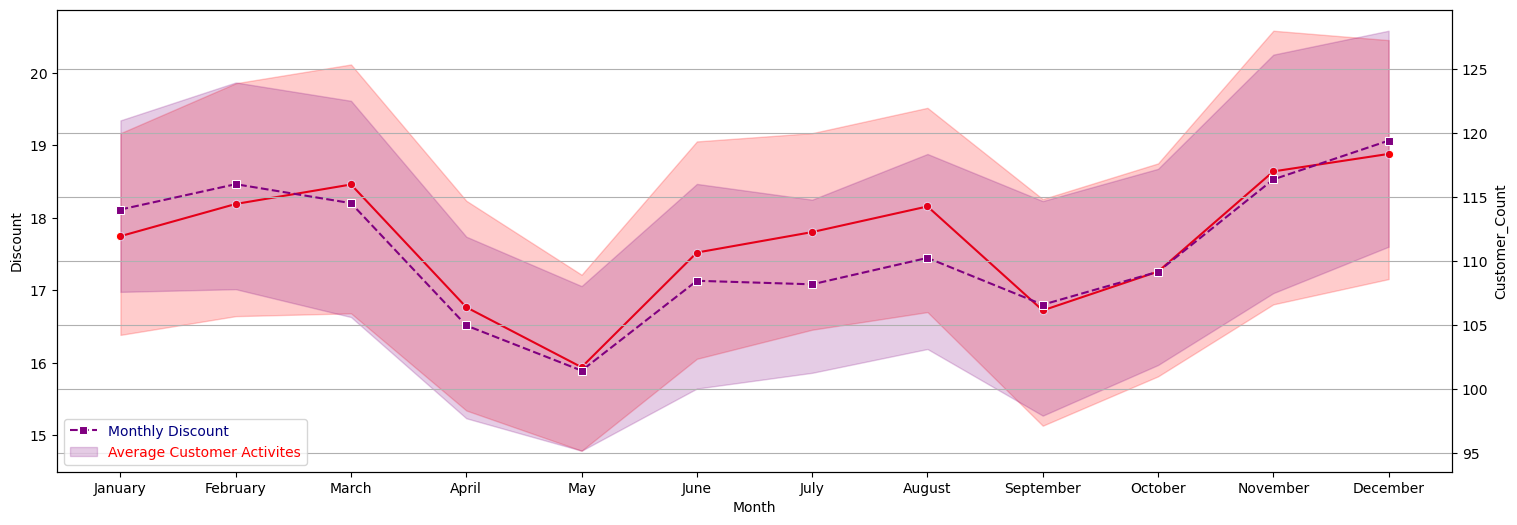

In [70]:
# Discount Analysis Overtime

fig, ax = plt.subplots(figsize=(18, 6))

sns.lineplot(x="Month", y="Discount", data=df, color="red", marker="o")
ax2= ax.twinx()
sns.lineplot(x="Month", y="Customer_Count", data=df, color="purple", marker="s", linestyle="--")

plt.legend(labels=["Monthly Discount", "Average Customer Activites"], loc="lower left", labelcolor=["navy", "red"])

plt.grid(True)
plt.show()

***Insight***: Indeed higher discounts attracts more customers 

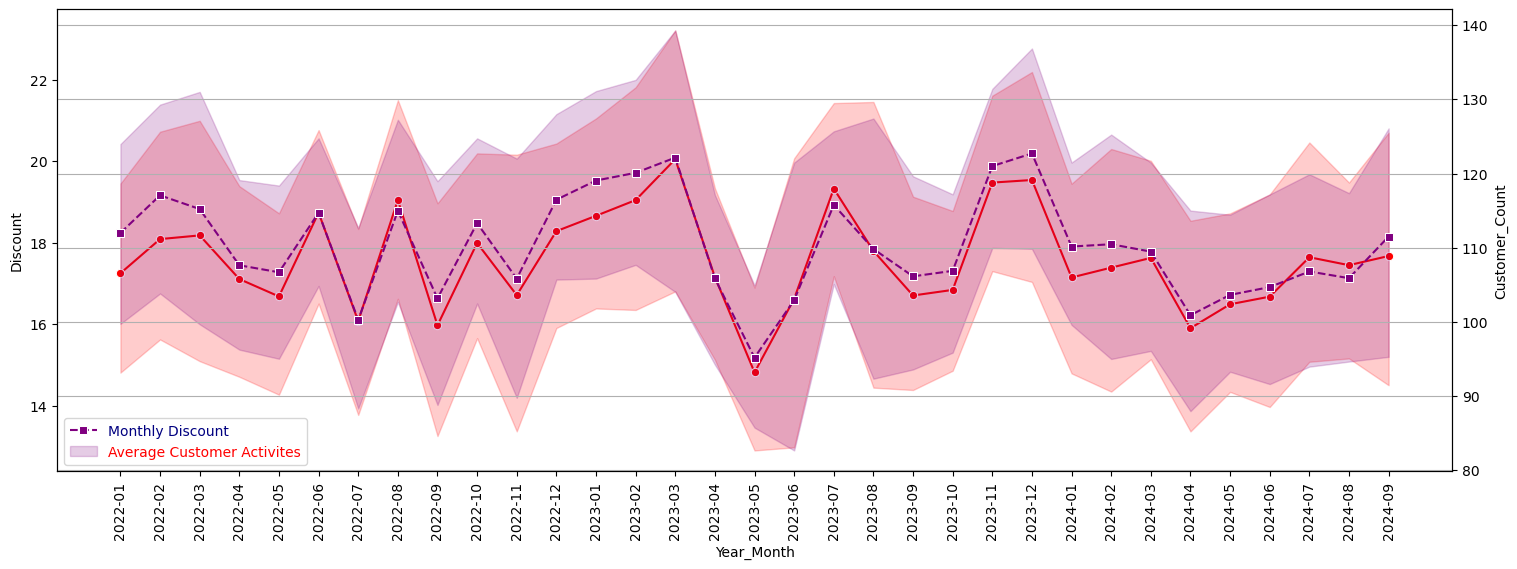

In [71]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.lineplot(x="Year_Month", y="Discount", data=df, color="red", marker="o")
plt.xticks(rotation=90)
ax2= ax.twinx()
sns.lineplot(x="Year_Month", y="Customer_Count", data=df, color="purple", marker="s", linestyle="--")

plt.legend(labels=["Monthly Discount", "Average Customer Activites"], loc="lower left", labelcolor=["navy", "red"])

plt.grid(True)
plt.show()

***Insight***: The same trends continues throughout the years. i.e. higher discount more customers

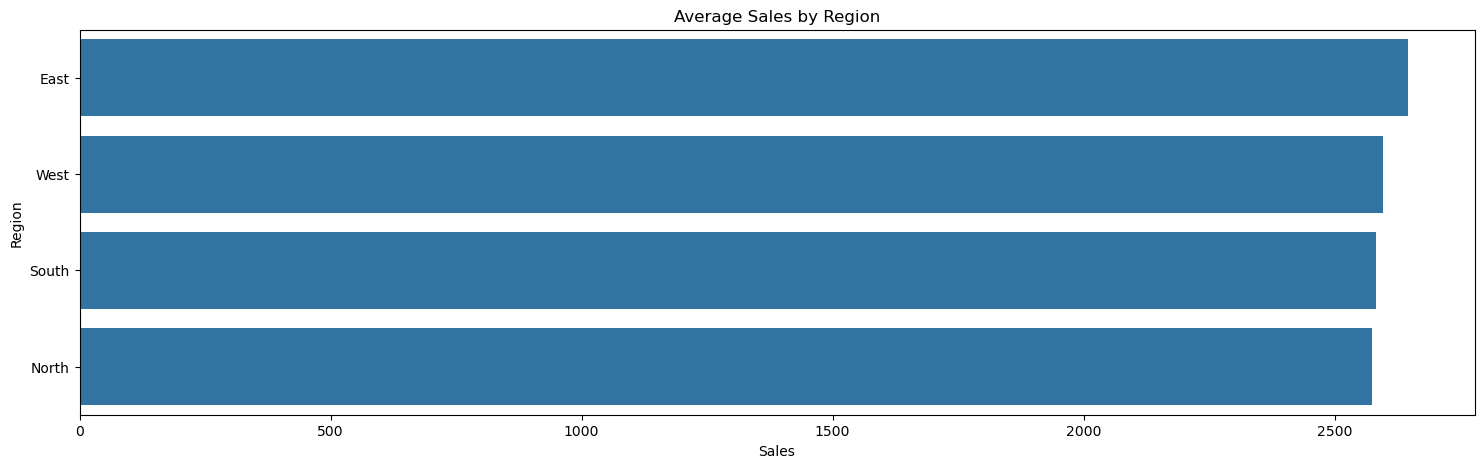

In [74]:
# Average Sales by Region 
plt.figure(figsize=(18,5))

sns.barplot(x="Sales", y="Region", data=df, orient="h", errorbar=None)
plt.title("Average Sales by Region")
plt.show()


***Insights***: The East Region slightly outperforms others, indicating potential regional dominance.

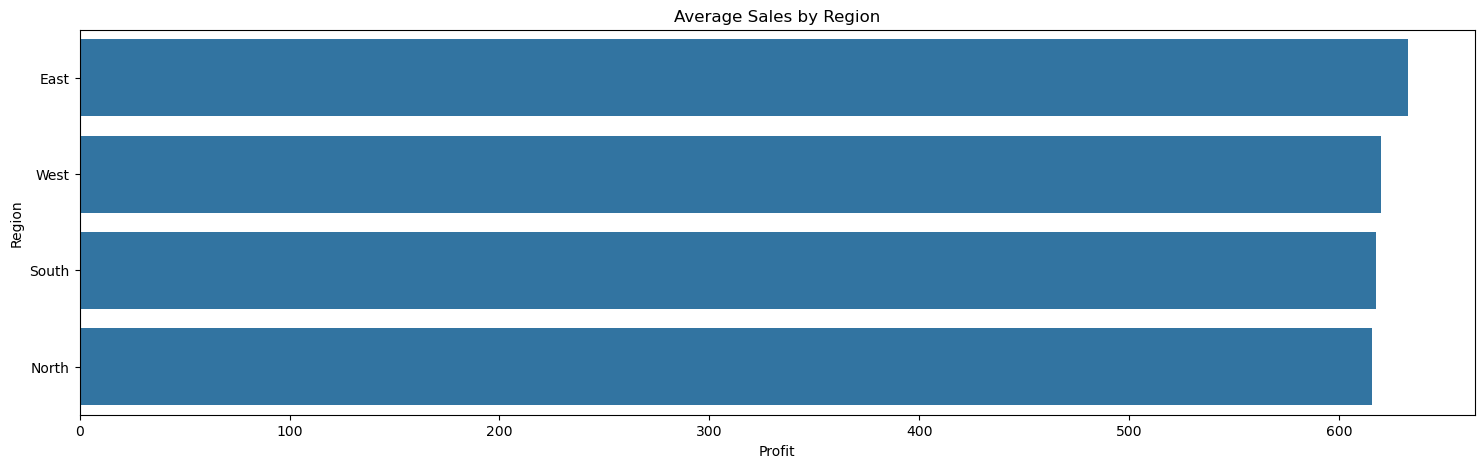

In [76]:
plt.figure(figsize=(18,5))

sns.barplot(x="Profit", y="Region", data=df, orient="h", errorbar=None)
plt.title("Average Sales by Region")
plt.show()


***Insights***: Again, the East region slightly outperforms others. 

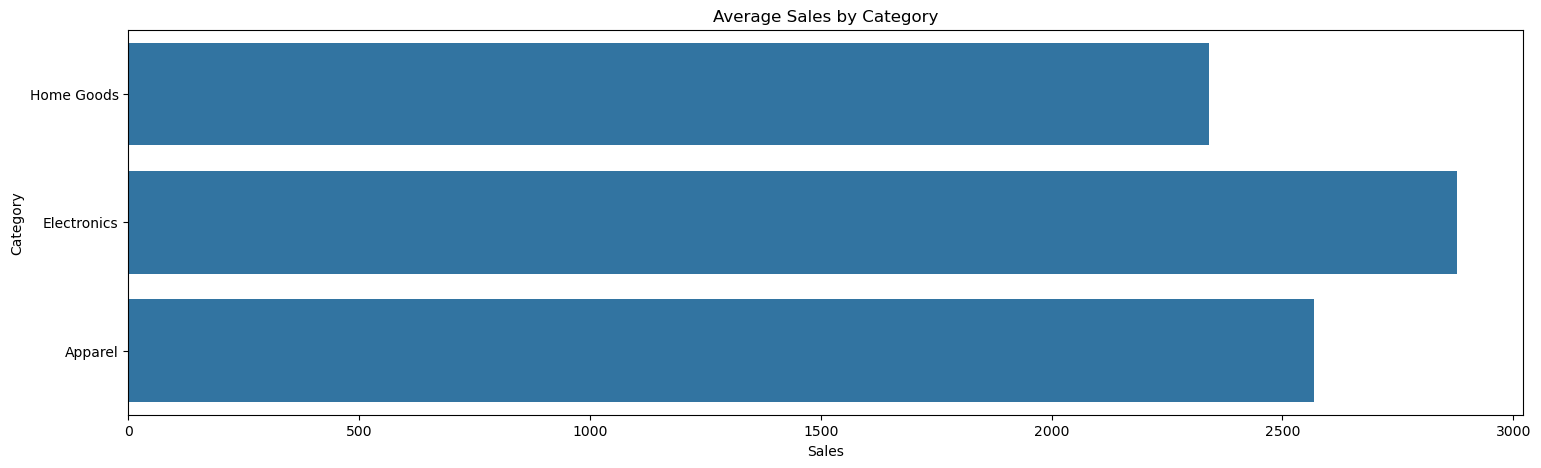

In [78]:
# Average Sales by Category 

plt.figure(figsize=(18,5))

sns.barplot(x="Sales", y="Category", data=df, orient="h", errorbar=None)
plt.title("Average Sales by Category")
plt.show()


***Insights***: Electronics lead in sales, while Home Goods perform relatively lower. 

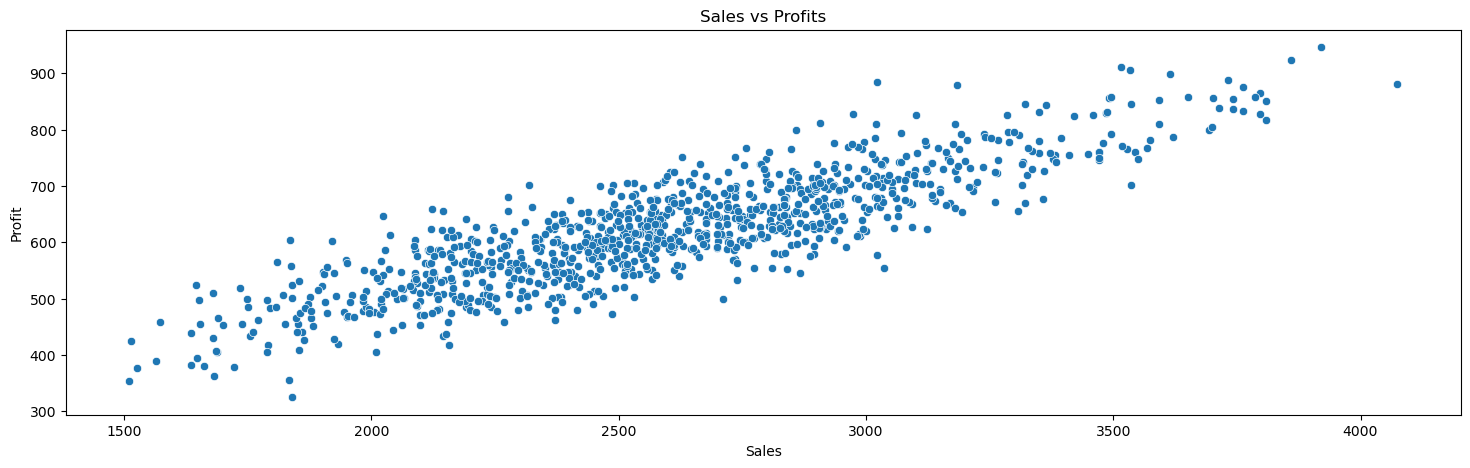

In [79]:
plt.figure(figsize=(18,5))

sns.scatterplot(x="Sales", y="Profit", data=df)
plt.title("Sales vs Profits")
plt.show()


***Insights***: The higher the sales the higher the profit 

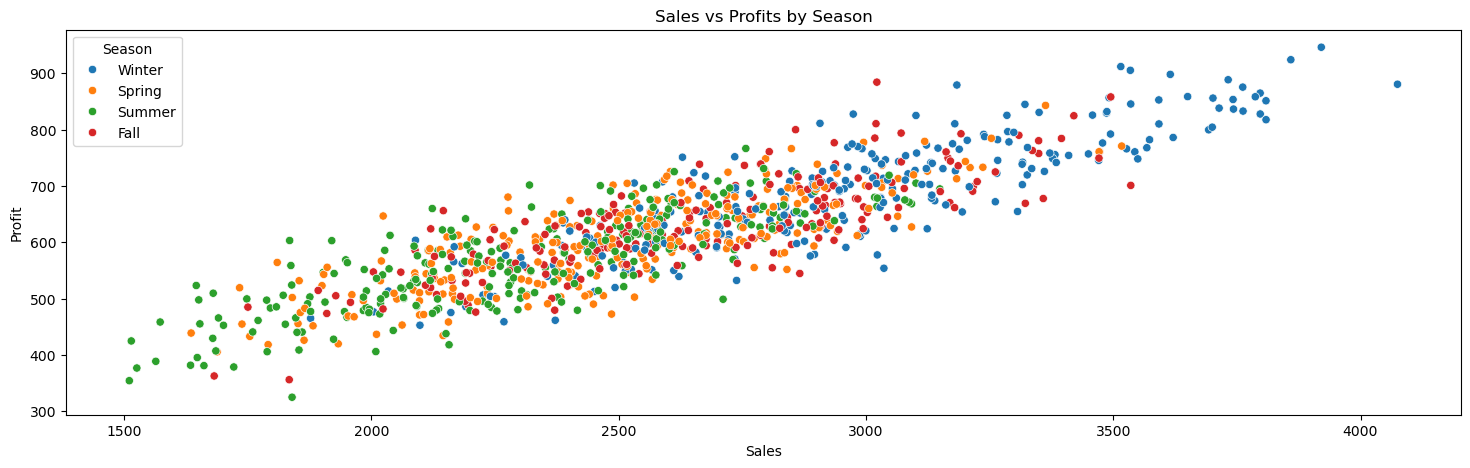

In [80]:
# Sales vs Profits by Season

plt.figure(figsize=(18,5))

sns.scatterplot(x="Sales", y="Profit", hue="Season", data=df)
plt.title("Sales vs Profits by Season")
plt.show()

***Insights***: Positve correlation exists between sales and profit, with clear seasonal variation. with Winter being the most profitable season.

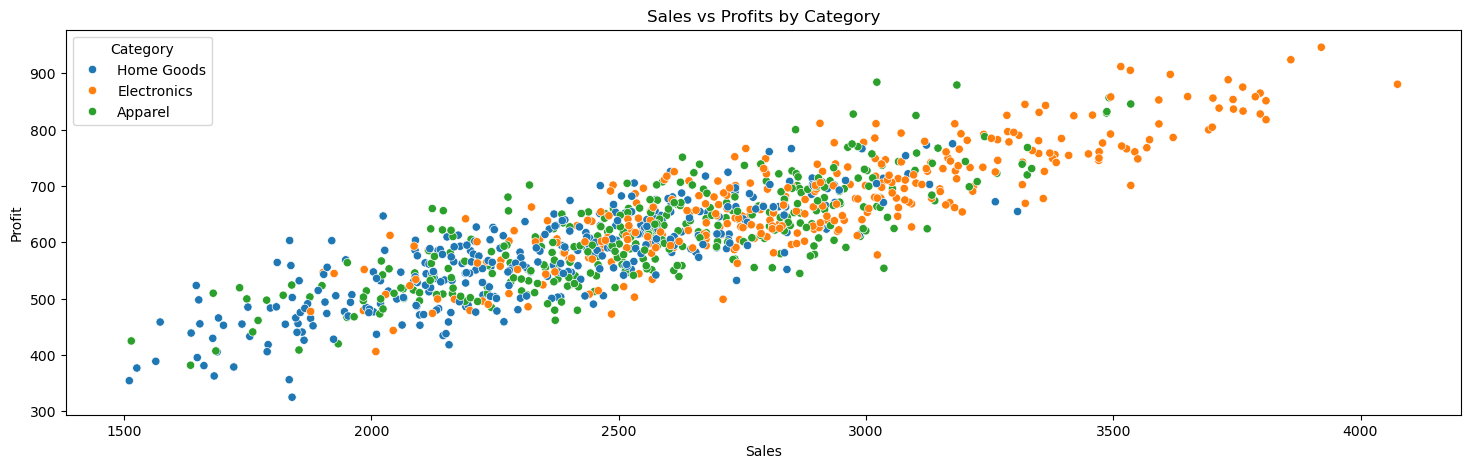

In [81]:
# Sales vs Profits by categories 

plt.figure(figsize=(18,5))

sns.scatterplot(x="Sales", y="Profit", hue="Category", data=df)
plt.title("Sales vs Profits by Category")
plt.show()

***Insights***:Most of the sales made are around electronics followed by apparel

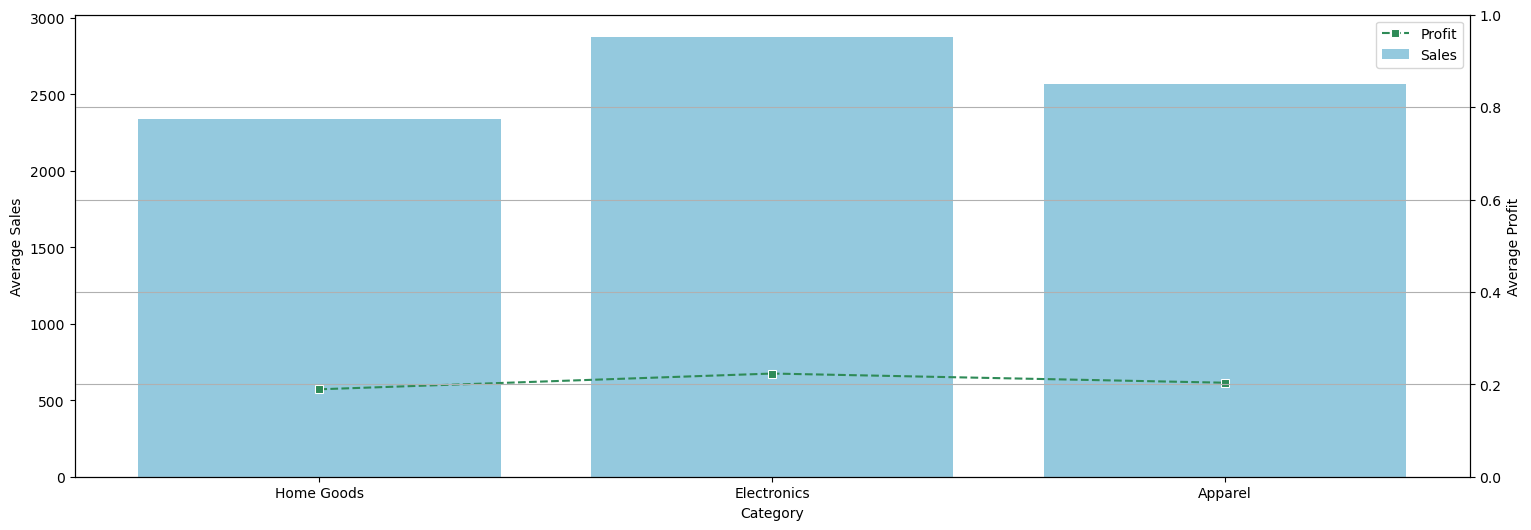

In [93]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.barplot(x="Category", y="Sales", data=df, color="Skyblue", label="Sales", errorbar=None, ax=ax)
plt.ylabel("Average Sales")
ax2= ax.twinx()
sns.lineplot(x="Category", y="Profit", data=df, color="Seagreen", label="Profit", errorbar=None, marker="s", linestyle="--", ax=ax)
plt.ylabel("Average Profit")
# ax.legend(labels=["Monthly Discount", "Average Customer Activites"], loc="lower left", labelcolor=["navy", "red"])

plt.grid(True)
plt.show()

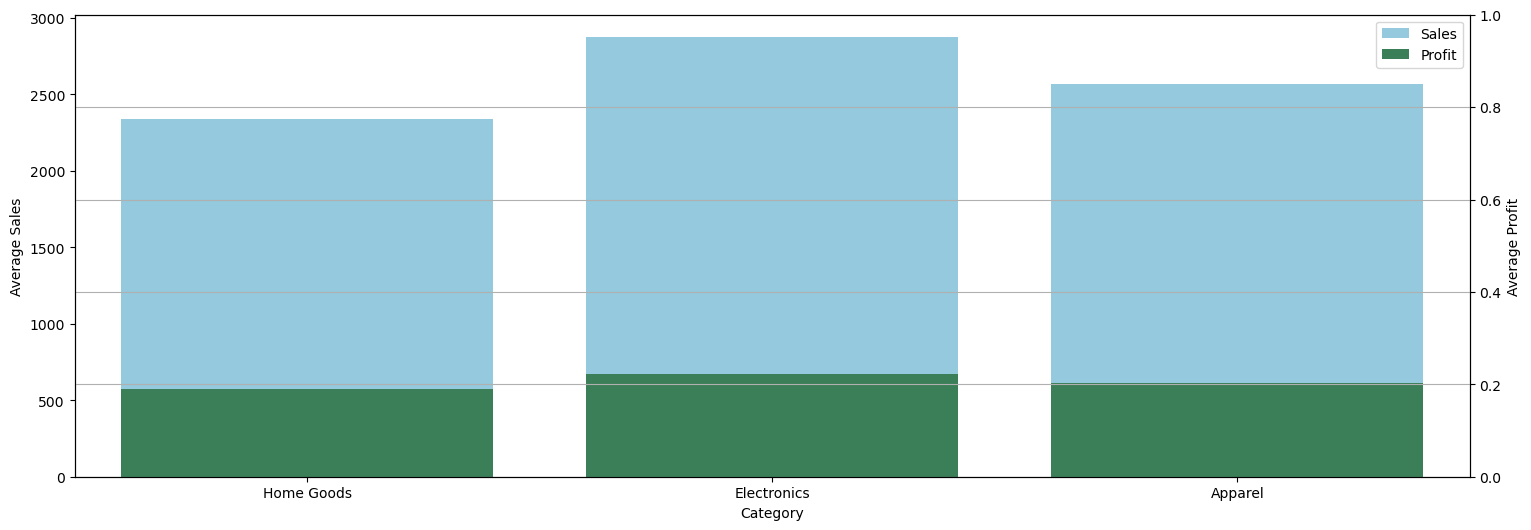

In [92]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.barplot(x="Category", y="Sales", data=df, color="Skyblue", label="Sales", errorbar=None, ax=ax)
plt.ylabel("Average Sales")
ax.twinx()
sns.barplot(x="Category", y="Profit", data=df, color="Seagreen", label="Profit", errorbar=None, ax=ax)
plt.ylabel("Average Profit")
# ax.legend(labels=["Monthly Discount", "Average Customer Activites"], loc="lower left", labelcolor=["navy", "red"])

plt.grid(True)
plt.show()

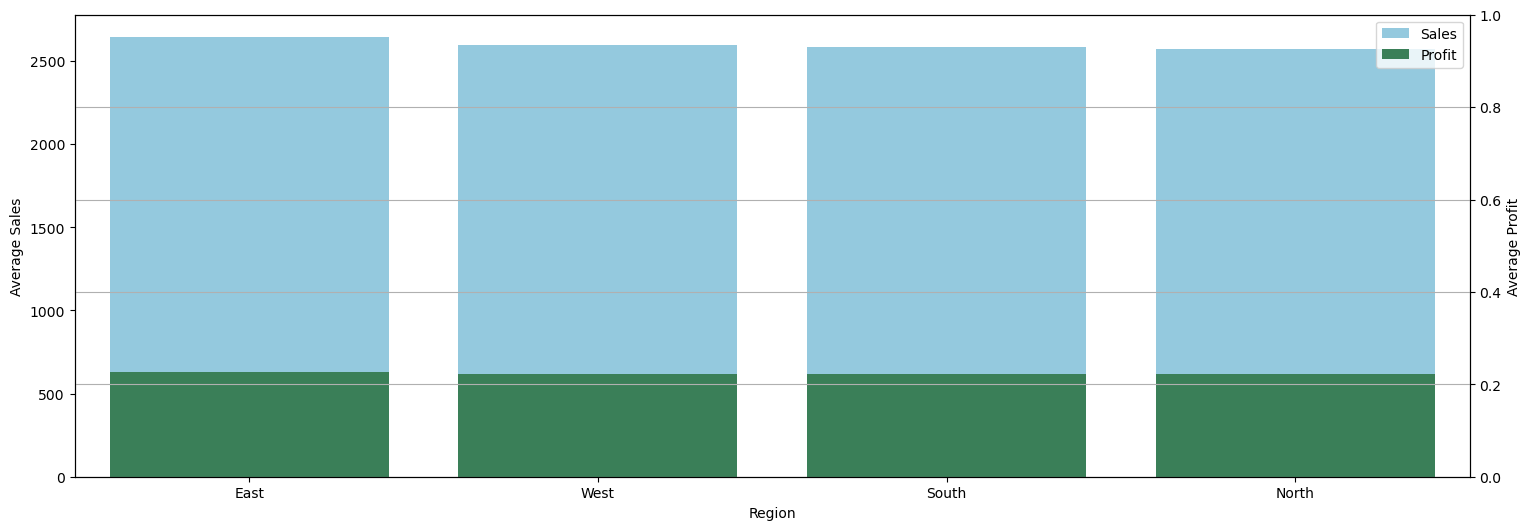

In [94]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.barplot(x="Region", y="Sales", data=df, color="Skyblue", label="Sales", errorbar=None, ax=ax)
plt.ylabel("Average Sales")
ax.twinx()
sns.barplot(x="Region", y="Profit", data=df, color="Seagreen", label="Profit", errorbar=None, ax=ax)
plt.ylabel("Average Profit")
# ax.legend(labels=["Monthly Discount", "Average Customer Activites"], loc="lower left", labelcolor=["navy", "red"])

plt.grid(True)
plt.show()

### Advertising Impart on Sales 

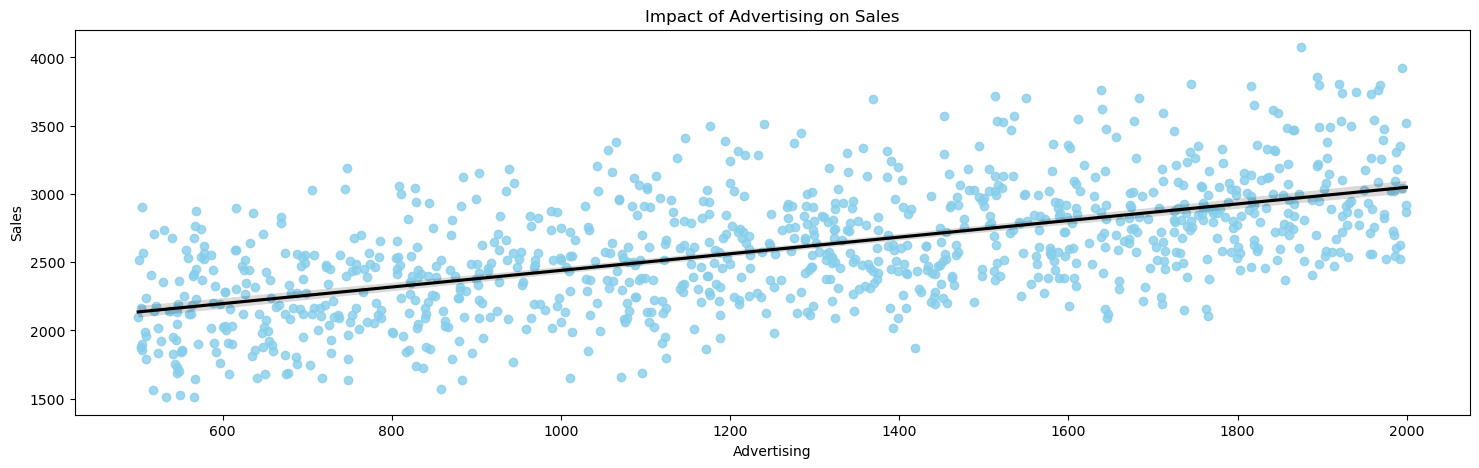

In [95]:
plt.figure(figsize=(18,5))

sns.regplot(x="Advertising", y="Sales", data=df, color="Skyblue", line_kws={"color":"black"})
plt.title("Impact of Advertising on Sales")
plt.show()


***Insight***: An increase in advertising spend generally leads to higher sales. (Positive correlation) 

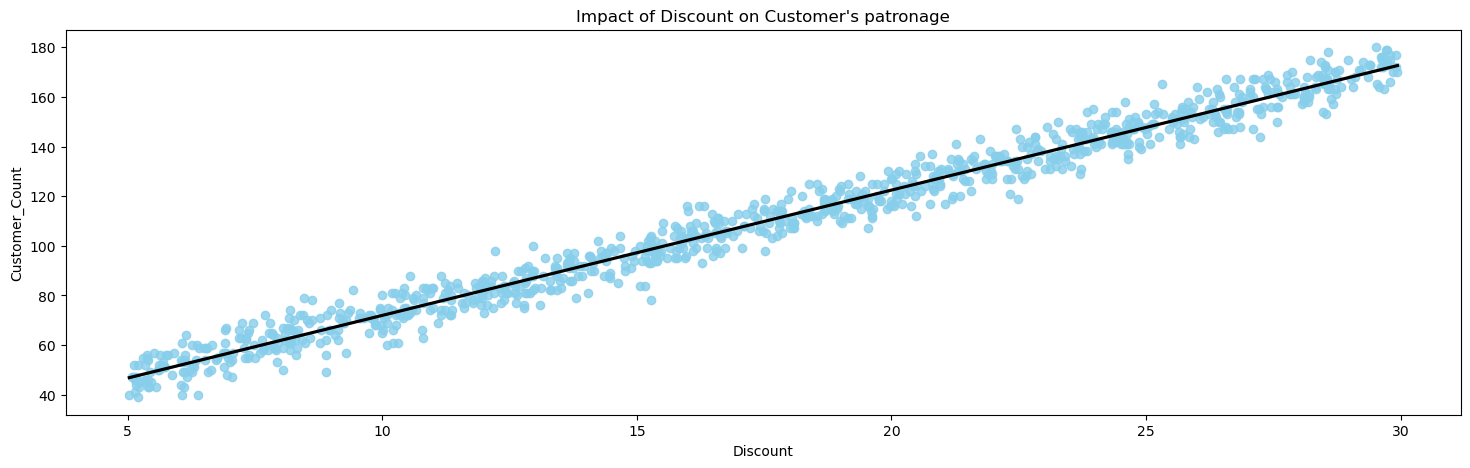

In [99]:
### Discount Impact on the customer patronage 

plt.figure(figsize=(18,5))

sns.regplot(x="Discount", y="Customer_Count", data=df, color="Skyblue", line_kws={"color":"black"})
plt.title("Impact of Discount on Customer's patronage")
plt.show()


***Insights***: Higher discount strongly leads to higher patrionization from both new and old customers.

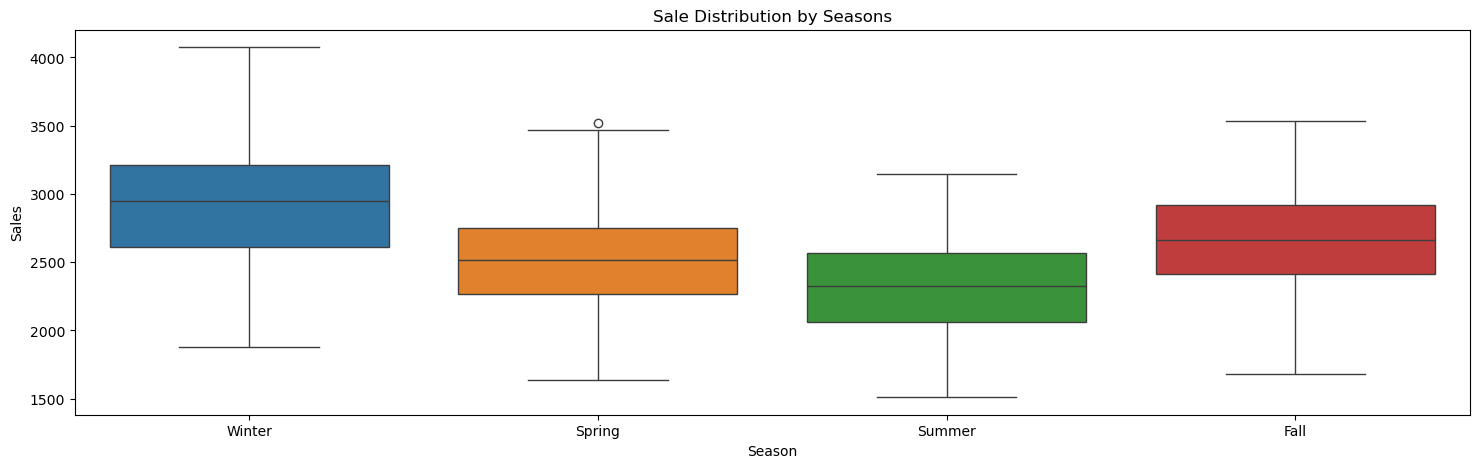

In [101]:
# Seasonal Sales Distribution

plt.figure(figsize=(18,5))

sns.boxplot(x="Season", y="Sales", hue="Season", data=df)
plt.title("Sale Distribution by Seasons")
plt.show()

***Insight***: Winter sees the highest sales, while summer has the lowest.

### Correlation Analysis

In [102]:
numeric_data = df.select_dtypes(include="number")

In [103]:
numeric_data.head()

,Advertising,Discount,Year,Sales,Customer_Count,Profit
0,1275.18,15.74,2022,2679.56,95,652.90
1,1893.89,24.74,2022,3859.05,147,924.16
2,727.38,8.46,2022,2450.71,79,512.75
3,1757.23,15.37,2022,3056.75,97,624.60
4,1507.46,16.22,2022,2840.15,116,617.43


In [107]:
correlation_map = numeric_data.corr()

In [108]:
correlation_map

,Advertising,Discount,Year,Sales,Customer_Count,Profit
Advertising,1.000000,-0.041544,0.052870,0.596664,-0.032036,0.508804
Discount,-0.041544,1.000000,-0.021071,0.276811,0.989094,0.223716
Year,0.052870,-0.021071,1.000000,-0.021249,-0.037677,0.006903
Sales,0.596664,0.276811,-0.021249,1.000000,0.309698,0.861604
Customer_Count,-0.032036,0.989094,-0.037677,0.309698,1.000000,0.248441
Profit,0.508804,0.223716,0.006903,0.861604,0.248441,1.000000


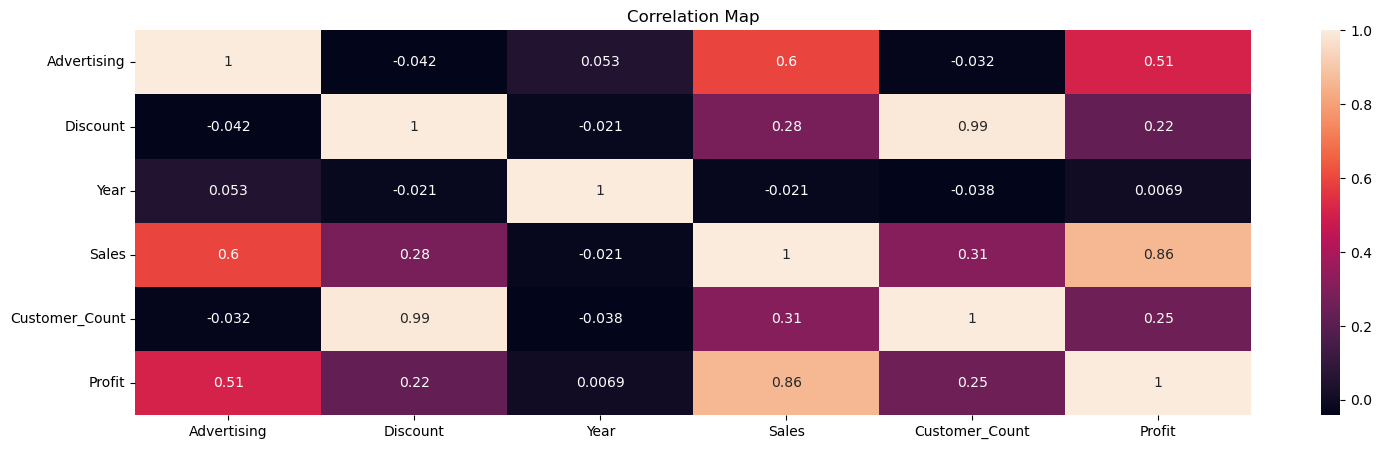

In [110]:
plt.figure(figsize=(18,5))

sns.heatmap(correlation_map, annot=True)
plt.title("Correlation Map")
plt.show()

***Insight***: Sales and profit have a srong positive correlation, while discounts show weak relationships with profit and sales. Discount shows a very strong positive correlation with Customer Count indicating that discount attracts more customers. 